With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some 
cars are in demand hence making them costly and some are not in demand hence cheaper. One 
of our clients works with small traders, who sell used cars. With the change in market due to covid 
19 impact, our client is facing problems with their previous car price valuation machine learning 
models. So, they are looking for new machine learning models from new data. We have to make 
car price valuation model.

So, our goal is to predict the used car price. :)

In [2]:
    # importing required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# loading data

train_data = pd.read_csv('Car_data.csv')


In [4]:
train_data = train_data.loc[:, ~train_data.columns.str.contains('^Unnamed')] #dropping the unnamed column.

In [4]:
#shape of train set
train_data.shape


(594, 6)

We see we have 594 cases with 6 features including the target feature.

In [5]:
#chekcing the missing values for test set before checking the accuracy of our selected model on test set
train_data.isnull().sum()

Brand            0
Year             0
Model            0
Price            0
Distance         0
Fuel_Capacity    0
dtype: int64

No null values are captured!

In [6]:
#checking and study briefly the train set sample before we do nothing:
train_data.head()

,Brand,Year,Model,Price,Distance,Fuel_Capacity
0,Fiat 500,2019 (68 reg),1.2 Lounge 3dr,"£9,995","22,091 miles",1.2L
1,Mitsubishi I,2007 (07 reg),0.7,£500,"50,000 miles",0.7L
2,Ford Focus,2007 (56 reg),1.6 LX 5dr,£790,"96,694 miles",1.6L
3,Volkswagen Golf,1999 (T reg),1.6 S 5dr,£495,"90,000 miles",1.6L
4,MINI Hatch,2005 (55 reg),1.6 Cooper Park Lane 3dr,"£1,850","74,000 miles",1.6L


Brand feature gives us the used car companies names, which we can use it to separate the flight data by different brands for comaprison.
A similar case happens with feature Year, against which we can compare different kind of used cars.
The feature Model indicates us the type or the name of the model of car.
The price will quantify the amount of money for which a car is offered.
The Distance can be helpful to understand the miles that have been occured as distance between the starting of used car and the moment of offer.
Finally, The Fuel capacity indicates the quantity of litres that a used car can own.

In [6]:
#statistical description of the data of object type festures
train_data.describe(include='all')

,Brand,Year,Model,Price,Distance,Fuel_Capacity
count,594,594,594,594,594,594
unique,158,64,400,178,266,24
top,Vauxhall Corsa,2008 (08 reg),1.2 Lounge 3dr,"£9,995","22,091 miles",1.6L
freq,47,45,19,19,19,126


So, the main findings here are the following ones:
    
    - If we check the count in the row, we can say count mentiones the total number of cases. Here we can notice there is no missing values as all the features have the same number of cases which is the total number of rows or cases.
    - In second row, we have unique values which counts the unique values of each feature.
    - Then, we have the top categorical o numerical value for each feature.
    - And finally, the frequency is the number of times a value occur.

In [8]:
train_data.dtypes #checing the dtypes of all features we have:

Brand            object
Year             object
Model            object
Price            object
Distance         object
Fuel_Capacity    object
dtype: object

Here we can easily see all the features are of type object.

In [9]:
#Now checking the data.info() so that we can confirm the missing values are imputed correctly alongside other type of info that can 
#be useful to check
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          594 non-null    object
 1   Year           594 non-null    object
 2   Model          594 non-null    object
 3   Price          594 non-null    object
 4   Distance       594 non-null    object
 5   Fuel_Capacity  594 non-null    object
dtypes: object(6)
memory usage: 28.0+ KB


As we can check we have the total number of rows for each feature we have, which means no missing values are left. Which in the other words means that we have 594 non null values.

Here we can check information of data type and information about number of values present in each column, and data types of each column. We observe that we have all the columns as ‘object’ data types  inluding the target variable.
And we also can check the total of columns and total of rows we have in our dataset. In this we have a total of 594 entries and total of 6 features including the target variable.

We now start exploring the columns available in our dataset. The first thing we do is to check the unique values present in these columns and their correspondents counts:

In [10]:
#checking now the values of each column:
for col in train_data.columns:    
    print(train_data[col].value_counts())
    print('---------------------------------------')

Vauxhall Corsa      47
-                   37
Ford Focus          28
Fiat 500            27
MINI Hatch          26
                    ..
Fiat Bravo           1
Ford Focus C-max     1
SEAT Altea XL        1
Renault Kangoo       1
Alfa Romeo 147       1
Name: Brand, Length: 158, dtype: int64
---------------------------------------
2008 (08 reg)    45
2007 (07 reg)    42
2010 (10 reg)    36
2009 (09 reg)    30
2018 (18 reg)    27
                 ..
2010 (59 reg)     1
2000 (X reg)      1
1995              1
1980 (V reg)      1
1993 (L reg)      1
Name: Year, Length: 64, dtype: int64
---------------------------------------
1.2 Lounge 3dr                     19
1.6L Mirror E-Torq 5dr             11
1.4 16v Dynamique 3dr              10
DESIGN CDTI ECOFLEX S/S 1.6 5dr    10
1.5L Cooper 5dr                    10
                                   ..
1.4 One Graphite 3dr                1
1.6 THP Sport XS 3dr                1
1.4 TD Style 3dr                    1
2.0 HDi Sport 5dr            

Let's highlight the most visible characteristics of this data:

So, first of all, we see Brand, from where we can highlight that Vauxall Corsa, Ford Focus, Fiat 500 and Mini Hatch are the 4 brands with highest number of used cards offered in the website and included in this dataset.
Secondly, regarding the Year, there are no specific dates when the used cars are not sold; the distribution is almost similar for all dates, at least for the first 5 values. But we have Years which are not that much important but we can highlight that the Years with highest cases of used cars are 2008,2007,2010,2009,2018.

Regarding the Model, we can say 1.2 Lounge 3dr, 1.6 Mirror E-Torq 5dr, 1.4 16v Dynamique 3dr  the 3 models with highest number of used cars when we are studying the model of the used car. And 1.4 One Graphite 3dr, 1.6 the sport XS 3dr,1.4 TD Style 3dr,2.0 HDi Sport 5dr and 1.6 16v XLine 5dr  have the minimum count of used cars in their website. And when checking the 9995, 1995 995, 1295 and 1000 as the most offered price for a used car and which means the maximums price.

And regarding the Distance, we have 22091 miles and 100000 miles as the 2 distances which are mostly used in our dataset. If you check more in detail, the first route is almost 46% higher when comparing with the second one.

When comapring the Fuel capacity , we have a total of 126 cases if we check all the cases with only 1.6L of capacity of fuel of a used car. And we have 108 cases of cases where we have a capacity of 1.4L of fuel.  Interesting!. Which means people in this dataset had more used cars with 1.6L of fuel capacity when compared to other options. And when comparing the third option, we see we have 98 cases which is only 16% when comparing with others. In summary, majority of the used cars have either fuel capacity of 1.6L or 1.4L.


In [7]:
#taking out the pound sign from the column price:
x = train_data['Price'].replace("£", " ")

print(x)

0      £9,995
1        £500
2        £790
3        £495
4      £1,850
        ...  
589      £995
590    £1,875
591    £1,790
592    £2,195
593    £8,150
Name: Price, Length: 594, dtype: object


In [8]:
train_data[train_data.Price == '-'] #checking the data with hyphen

,Brand,Year,Model,Price,Distance,Fuel_Capacity
71,-,-,-,-,-,-
84,-,-,-,-,-,-
92,-,-,-,-,-,-
185,-,-,-,-,-,-
309,-,-,-,-,-,-
416,-,-,-,-,-,-
469,-,-,-,-,-,-
499,-,-,-,-,-,-
519,-,-,-,-,-,-


In [9]:
#checking the missing values : 
train_data.isnull().sum()

Brand            0
Year             0
Model            0
Price            0
Distance         0
Fuel_Capacity    0
dtype: int64

In [10]:
#taking out pound sign, comma and hypenn as we do not have differenct currencies, decimals and we need to drop the Nan values for column Price.

#print(float(train_data.Price[:,:][1:]))
train_data['Price'] = train_data['Price'].str.replace('£', '')
train_data['Price'] = train_data['Price'].str.replace(',', '')
train_data['Price'] = train_data['Price'].str.replace('-', str(0))
#train_data['Price'] = train_data[train_data.Price != '-']
#train_data = train_data[train_data != '-']
train_data['Price'] = train_data['Price'].astype(int)

In [11]:
train_data.Price.value_counts()

9995    19
1995    19
995     17
1295    16
1000    16
        ..
2189     1
1100     1
3490     1
2450     1
1790     1
Name: Price, Length: 178, dtype: int64

As we said, the price 9995, 1995,995, 1295 and 1000 are the prices in pounds for which the used cars are mostly offered.

In [12]:
train_data.isnull().sum() #checking again and making sure we have no null values anymore.

Brand            0
Year             0
Model            0
Price            0
Distance         0
Fuel_Capacity    0
dtype: int64

<AxesSubplot:xlabel='Brand', ylabel='Price'>

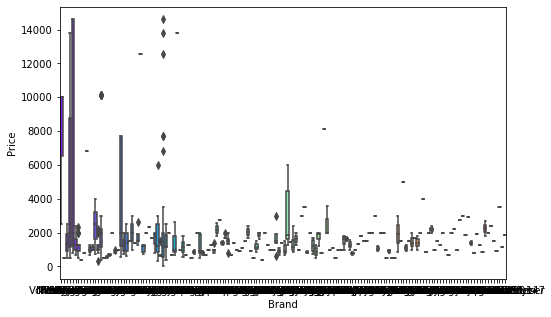

In [17]:
#boxplotting the price by Brand:

plt.figure(figsize=(8,5))
sns.boxplot(x='Brand',y='Price',data=train_data, palette='rainbow')
#plt.title("Price by %f", col)

Since we have a large list of brands, so we can't have a clear pattern on the Brand data. But, we can see some brands have high variance on the price and other not that much.

<AxesSubplot:xlabel='Year', ylabel='Price'>

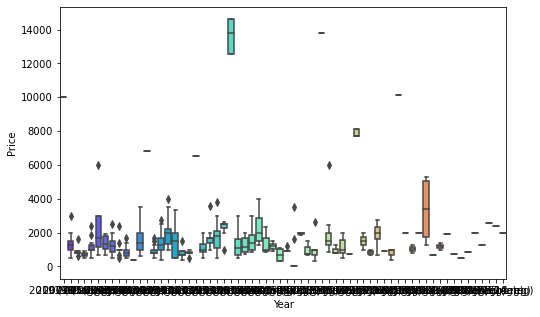

In [18]:
#boxplotting the price by Year:

plt.figure(figsize=(8,5))
sns.boxplot(x='Year',y='Price',data=train_data, palette='rainbow')
#plt.title("Price by %f", col)

Here happens somethink similar to our previous plot, Since we have a large list of Year, so we can't have a clear pattern on the Year data. But, we can see some Year have high variance on the price (for example, the orange boxplot) and other not that much.

<AxesSubplot:xlabel='Model', ylabel='Price'>

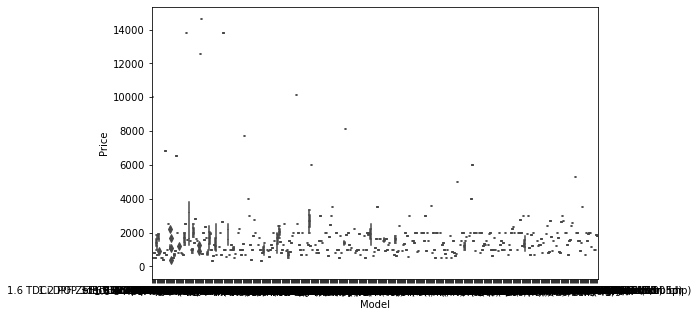

In [19]:
#boxplotting the price by Model:

plt.figure(figsize=(8,5))
sns.boxplot(x='Model',y='Price',data=train_data, palette='rainbow')
#plt.title("Price by %f", col)

Again, same, Since we have a large list of Mofrl, so we can't have a clear pattern on the Model data. But, we can see some Model have high variance on the price and other not that much.

<AxesSubplot:xlabel='Distance', ylabel='Price'>

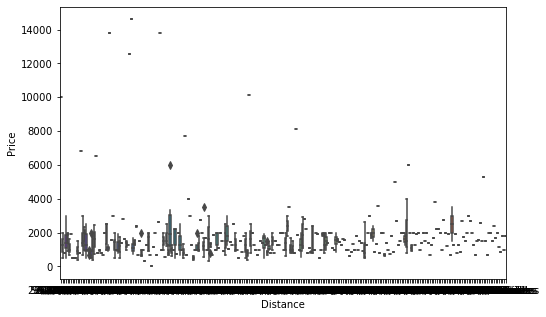

In [20]:
#boxplotting the price by Distance:

plt.figure(figsize=(8,5))
sns.boxplot(x='Distance',y='Price',data=train_data, palette='rainbow')
#plt.title("Price by %f", col)

Again, same, Since we have a large list of Distance, so we can't have a clear pattern on the Distance data. But, we can see some Distance have high variance on the price and other not that much.

<AxesSubplot:xlabel='Fuel_Capacity', ylabel='Price'>

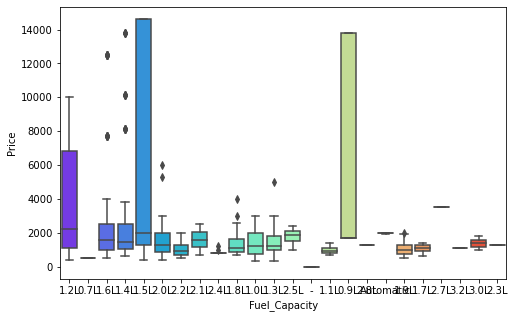

In [21]:
#boxplotting the price by Fuel Capacity:

#for col in train_data.columns:
plt.figure(figsize=(8,5))
sns.boxplot(x='Fuel_Capacity',y='Price',data=train_data, palette='rainbow')
   # plt.title("Price by %f", col)

Here we can clearly see that 1,5L, 1,2L and 1.9L2 are the 3 different fuel capacity with highest variance on the distribution.

<AxesSubplot:xlabel='Model', ylabel='Price'>

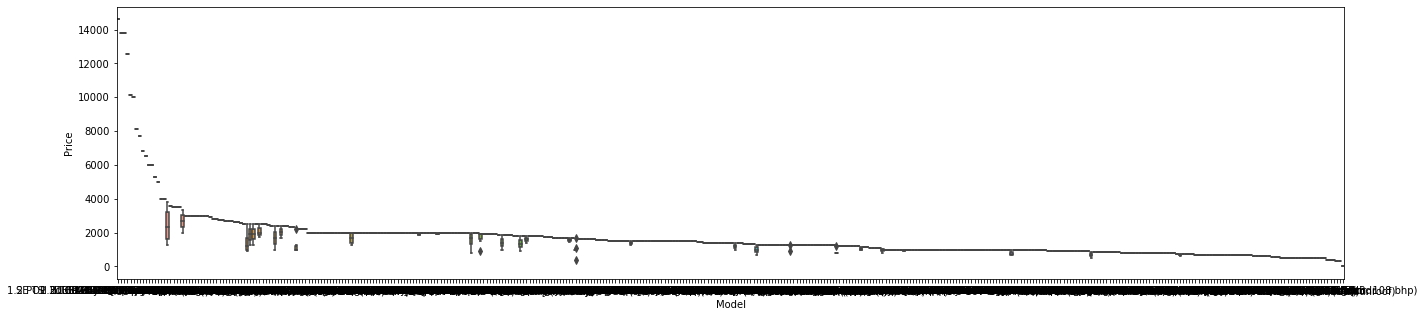

In [22]:
#oxplotting the Prices by Model:
plt.figure(figsize=(22,5))
sns.boxplot(x='Model', y='Price', data=train_data.sort_values('Price',ascending=False)) 

As seen above, some have high dispersion in data and others not that much.

<AxesSubplot:>

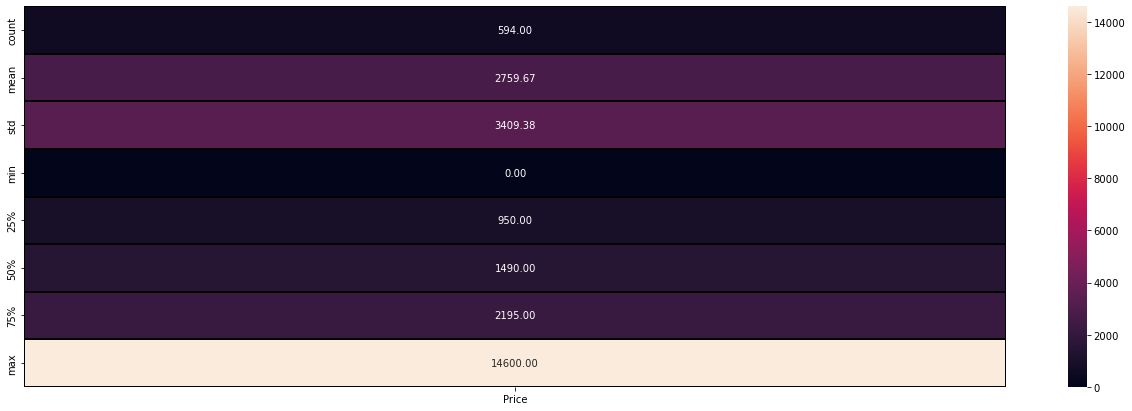

In [13]:
#statistics for numerical column Price:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(train_data.describe(),annot=True,linewidth=0.1,linecolor="black",fmt="0.2f")

Here in the above table we can see the target feature Price has no missing data (594 cases). It has a mean of 2759,67 pounds and a stardard deviation of 3409,38 pounds. As you see, the dispersion is higher than the actual mean.

And the minimum price is 0 which is fine ad when checking the interquantile prices, we see have 950 pounds as 25% percentile and 2195 pounds as the highest percentile having 1490 pounds as the median value and 14600 as the maximum price. Which means we have outliers as the maximum 14600 is way higher than the 75% percentile with price 2195 pounds.


Here we can easily observe that the mean is higher than the median, which means we have right skewed distribution in our target price as the mean is higher than its median.

In [24]:
#checking the nulls values:
train_data.isnull().sum()

Brand            0
Year             0
Model            0
Price            0
Distance         0
Fuel_Capacity    0
dtype: int64

In [25]:
#rechecking null values and the type of data in each column:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          594 non-null    object
 1   Year           594 non-null    object
 2   Model          594 non-null    object
 3   Price          594 non-null    int64 
 4   Distance       594 non-null    object
 5   Fuel_Capacity  594 non-null    object
dtypes: int64(1), object(5)
memory usage: 28.0+ KB


We see we have 594 cases and a total of 6 features including the target Price. 

Regarding the data type,we have 1 feature (target Price) as the numerical integer dtype and the others 5 as object dtype.

And now, we have no null values in our dataset.

<Figure size 1440x1296 with 0 Axes>

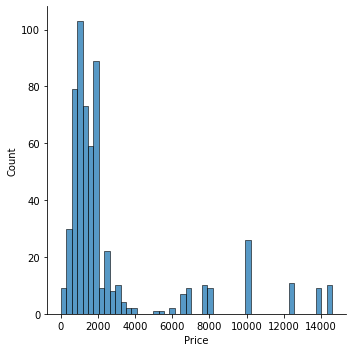

In [26]:
#ploting the Price distribution:
plt.figure(figsize=(20,18))
sns.displot(train_data.Price)

So, in the above plote we can see the price values are mostly between 0 and 2000. and
And as we said previously, it difers to that the mean is higher than the median, which means we have right skewed distribution in our target price as the mean is higher than its median.

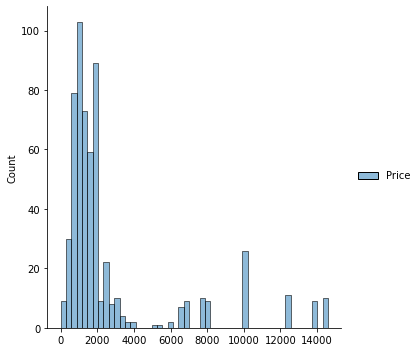

In [27]:
sns.displot(train_data) #displot of price which is same as previous plot

Same as previous plot:
    
    So, in the above plote we can see the price values are mostly between 0 and 2000.
And as we said previously, it difers to that the mean is higher than the median, which means we have right skewed distribution in our target price as the mean is higher than its median.

In [14]:
#lael encoding the columns with object type data for ML training purposes:

from sklearn.preprocessing import LabelEncoder

for col in train_data.columns:
        if train_data[col].dtype == object:
            train_data[col] = LabelEncoder().fit_transform(train_data[col])
            #train_data[col] = LabelEncoder().fit_transform(train_data[col].astype(str))

In [15]:
train_data.dtypes #checking dtypes after have label encoded:

Brand            int64
Year             int64
Model            int64
Price            int64
Distance         int64
Fuel_Capacity    int64
dtype: object

In [16]:
#statistical description of the data of numerical festures which in this case is Price
train_data.describe(include='all')

,Brand,Year,Model,Price,Distance,Fuel_Capacity
count,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000
mean,82.525253,38.234007,183.569024,2759.671717,126.341751,8.501684
std,49.866975,14.565458,118.468442,3409.380782,77.637955,3.740868
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.000000,30.000000,73.250000,950.000000,60.000000,6.000000
50%,88.500000,38.000000,171.500000,1490.000000,122.000000,8.000000
75%,139.000000,47.750000,285.750000,2195.000000,193.000000,11.000000
max,157.000000,63.000000,399.000000,14600.000000,265.000000,23.000000


Here in the above table we can comment the follwing finding:
    
    Here in the above table we can see all the features have no missing data (594 cases). 
    
    As you see, the dispersion of price is higher than the actual mean.The remaining features have mean higher thn the dispersion.

    And the minimum of all features is 0 which is fine 

ad when comparing the 75% quantile and the maximum values, we see all the features including our target haver its maximum higher than its 75% quantile, Which means we have outliers as the maximum is way higher than the 75% percentile.


Here we can easily observe that the mean of Price is higher than the median, which means we have right skewed distribution in our target price as the mean is higher than its median. It happens the same with feature Year, Model, Distance and Fuel_Capacity.Except the feature Brand which has the median higher than mean, which means for feature Brand we have a left skewed distribution.

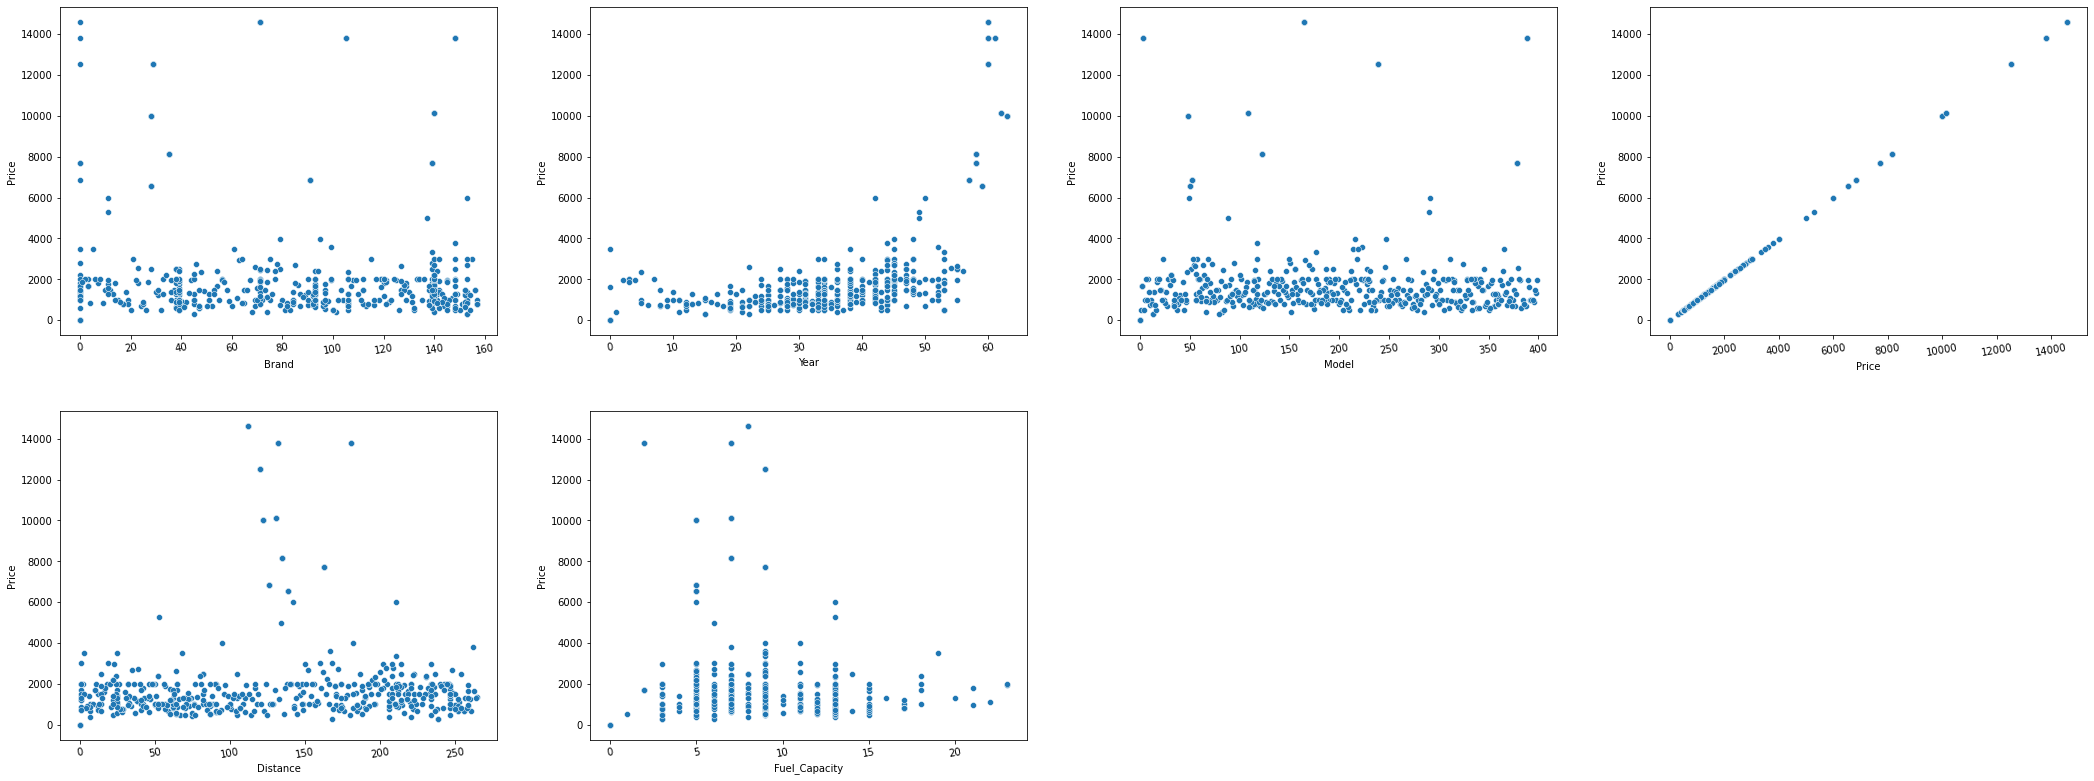

In [31]:
#Price in relation to other features data:
c=1
plt.figure(figsize=(30,45))
for i in train_data.columns:
    plt.subplot(8,4,c)
    sns.scatterplot(x =train_data[i], y=train_data.Price)
    plt.xticks(rotation=10)
    plt.tight_layout(pad=4)
    c=c+1
plt.show()


Let's comment and highlight the relations where we can from the above scatterplots:
Except the Price itself, all other features have no linear pattern in the above plots.
All the features have outliers pattern in the above plots.

And if we check the Fuel Capacity in detail, we see that the less Fuel Capacity is, the high is the dispersion of the data values.

Let's distplot and check if we have the same conclusions!

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

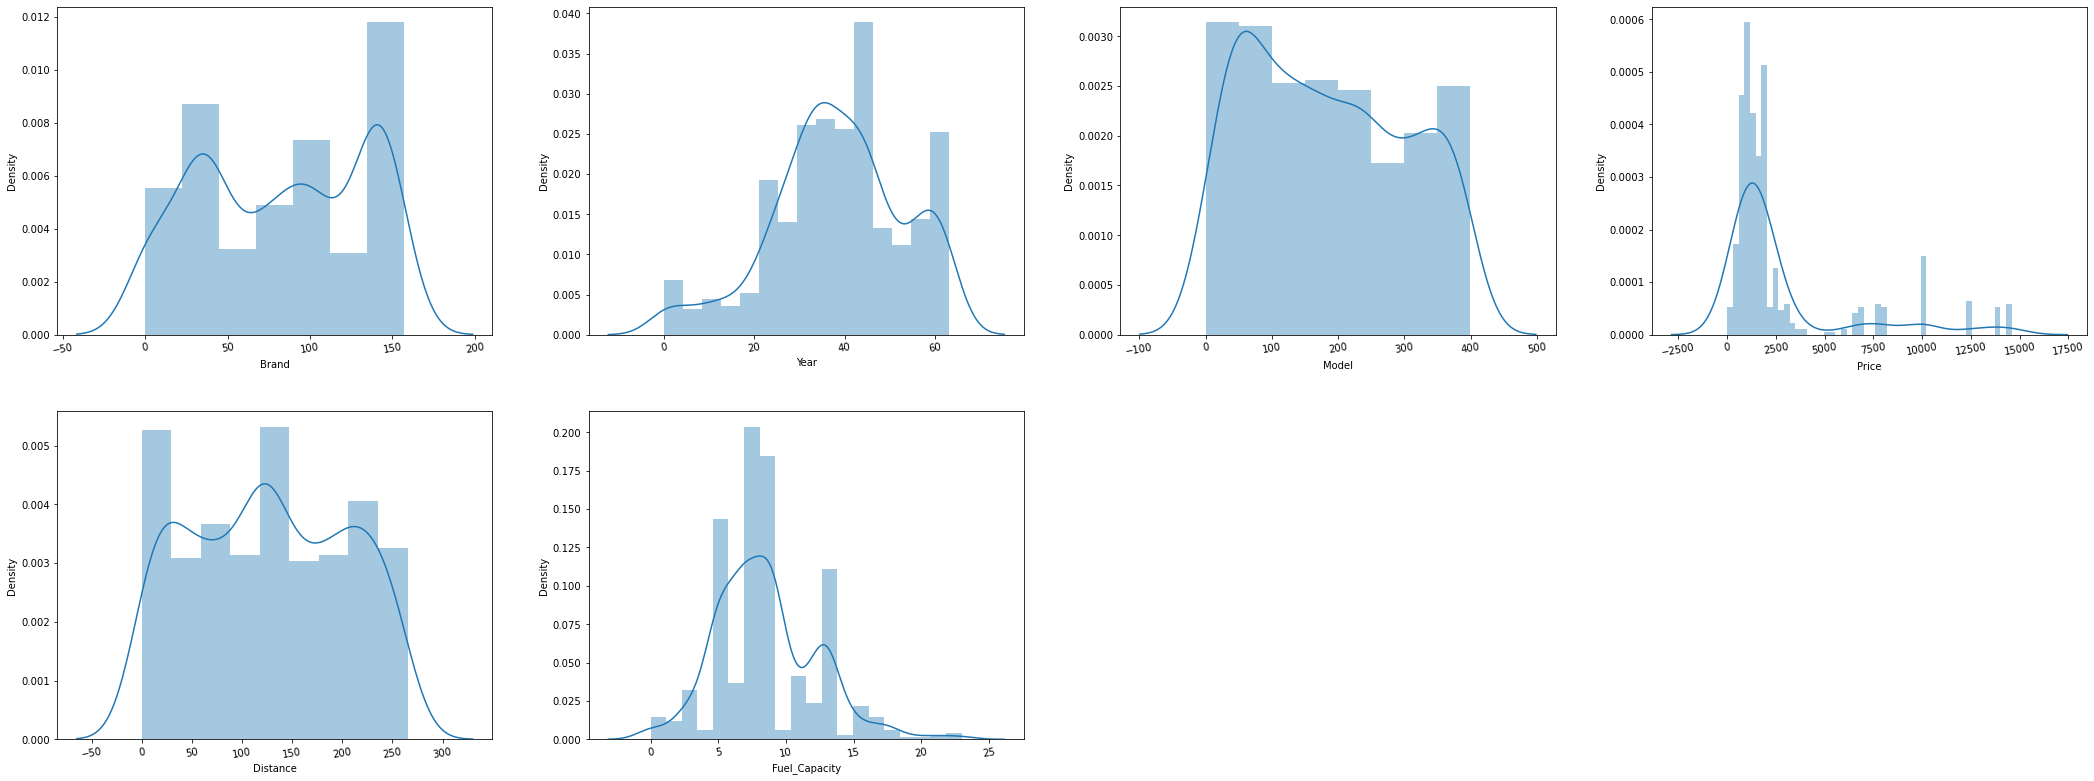

In [32]:
#checking the distribution of all features:
plt.figure(figsize=(30,45)) 
c=1
for i in train_data.columns:
    plt.subplot(8,4,c)
    sns.distplot(train_data[i])                                 #sns.scatterplot(x =train_data[i], y=train_data.Price)
    plt.xticks(rotation=10)
    plt.tight_layout(pad=4)
    c=c+1
plt.show()

First of all, we can hihlight the following observation of all the distribution:
    - We have distribution near to Normal distribution except a few features.
    - For feature Brands, as we said, we have Vauxhall Corsa with the highest number of cases.
    - For feature Year, as we said, we have 2008 and 2007 have the highest number of cases.
    - For feature model, almost all the models have a quite similar number cases, close to each other.
    - Price has a right skewed distribution as its mean is higher than its median.
    - For feature Distance, we see the 22,091 miles,100,000 miles,95,000 miles,21,819 miles are the 4 with highest number of cases.
    - For feature Fuel capacity, we see we have a distribution that is centered throughout the different Fuel Capacity having median, mode and mean near to value between 1.4L and 1.6L.

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

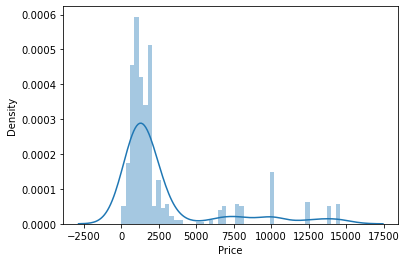

In [33]:
#Distibution of ‘Price’ column:
sns.distplot(train_data.Price)


Regarding the price target, the majority of the USED Cars have price range between around 0-2.5k and then the cars number decreses after the price range over 2.5k. Used cars having prices greater than 15k are quite less. Price range is skewed towards right. As we said earlier in the analisis, we have right skewness in the target price. We will now compare several independent features with ‘Price’ column to check their impact:

In [34]:
#defining the plot function:
def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


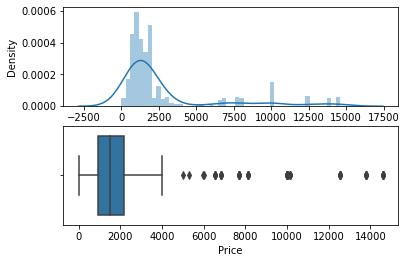

In [35]:
#let's plot 'Price' boxplot and distplot:
plot(train_data,'Price')

If we check density, as we said, we have range of 0 and 2.5k. So, the distribution has right skewness. And then, if we check boxplot, we see a median on around 1.6k which means outliers taking place between 4k and 17.5k are impacting way more than the other cases.

In [36]:
#columns
train_data.columns

Index(['Brand', 'Year', 'Model', 'Price', 'Distance', 'Fuel_Capacity'], dtype='object')

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


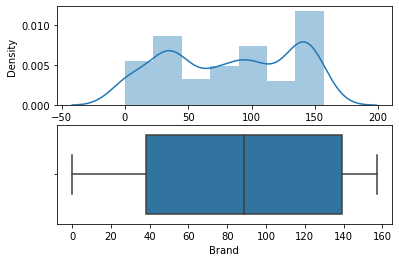

In [38]:
#plotting Brand:
plot(train_data,'Brand')

So, the distribution is close to normal distribution.Checking the median doesn't make any much sense as this feature should be studied as categorical data.

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


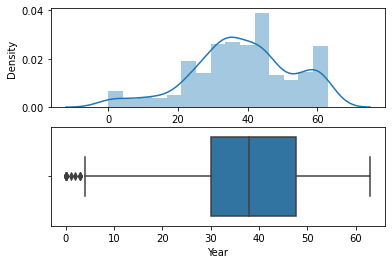

In [39]:
#plotting Year:
plot(train_data,'Year')

So, the distribution has a bit of left skewed distribution but it isnt meaningful as it should be treated as categorical data or date-serial type data.Checking the median doesn't make any much sense as this feature should be studied as categorical data.

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


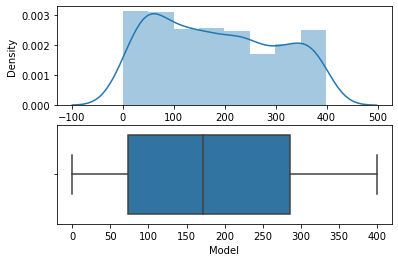

In [40]:
#plotting Model:
plot(train_data,'Model')

So, the distribution has a bit normal distribution. Checking the median doesn't make any much sense as this feature should be studied as categorical data.

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


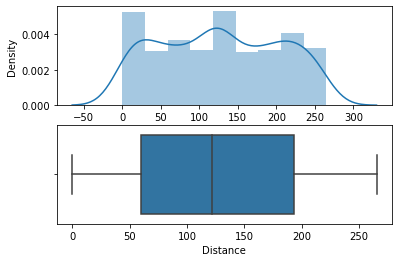

In [41]:
#plotting Distance:
plot(train_data,'Distance')

If we check density, as we said, we have the feature Distance with a range of 0 and 250k. So, the distribution is more likely to be a semi normal distribution. And then, if we check boxplot, we see a median on around 124k and there is no outliers as seen in the boxplot.


/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


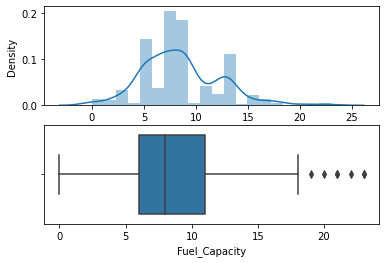

In [45]:
#plotting Fuel Capacity:
plot(train_data,'Fuel_Capacity')

As we said earlier, Fuel Capacity has a normal distribution as its median is very close to the mea.

And in boxplot, we have outliers when label encoded code is higher than 18 which we should have not label encoded, instead changed to data type numerical float instead of label encoding it.

Brand               AxesSubplot(0.125,0.749828;0.0824468x0.130172)
Year             AxesSubplot(0.223936,0.749828;0.0824468x0.130172)
Model            AxesSubplot(0.322872,0.749828;0.0824468x0.130172)
Price            AxesSubplot(0.421809,0.749828;0.0824468x0.130172)
Distance         AxesSubplot(0.520745,0.749828;0.0824468x0.130172)
Fuel_Capacity    AxesSubplot(0.619681,0.749828;0.0824468x0.130172)
dtype: object

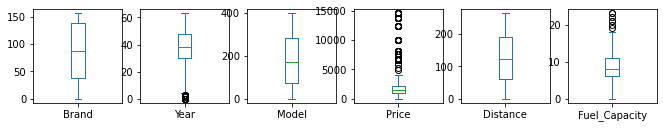

In [43]:
#plotting the boxplot for each column in order to check the outliers 
train_data.plot(kind='box',subplots = True,layout=(5,8),figsize = (15,10))

So, in the boxplot plotted above, we can easily see we have outliers in almost all our features except Brand, Model and Distance.

array([[<AxesSubplot:title={'center':'Brand'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Model'}>,
        <AxesSubplot:title={'center':'Price'}>],
       [<AxesSubplot:title={'center':'Distance'}>,
        <AxesSubplot:title={'center':'Fuel_Capacity'}>]], dtype=object)

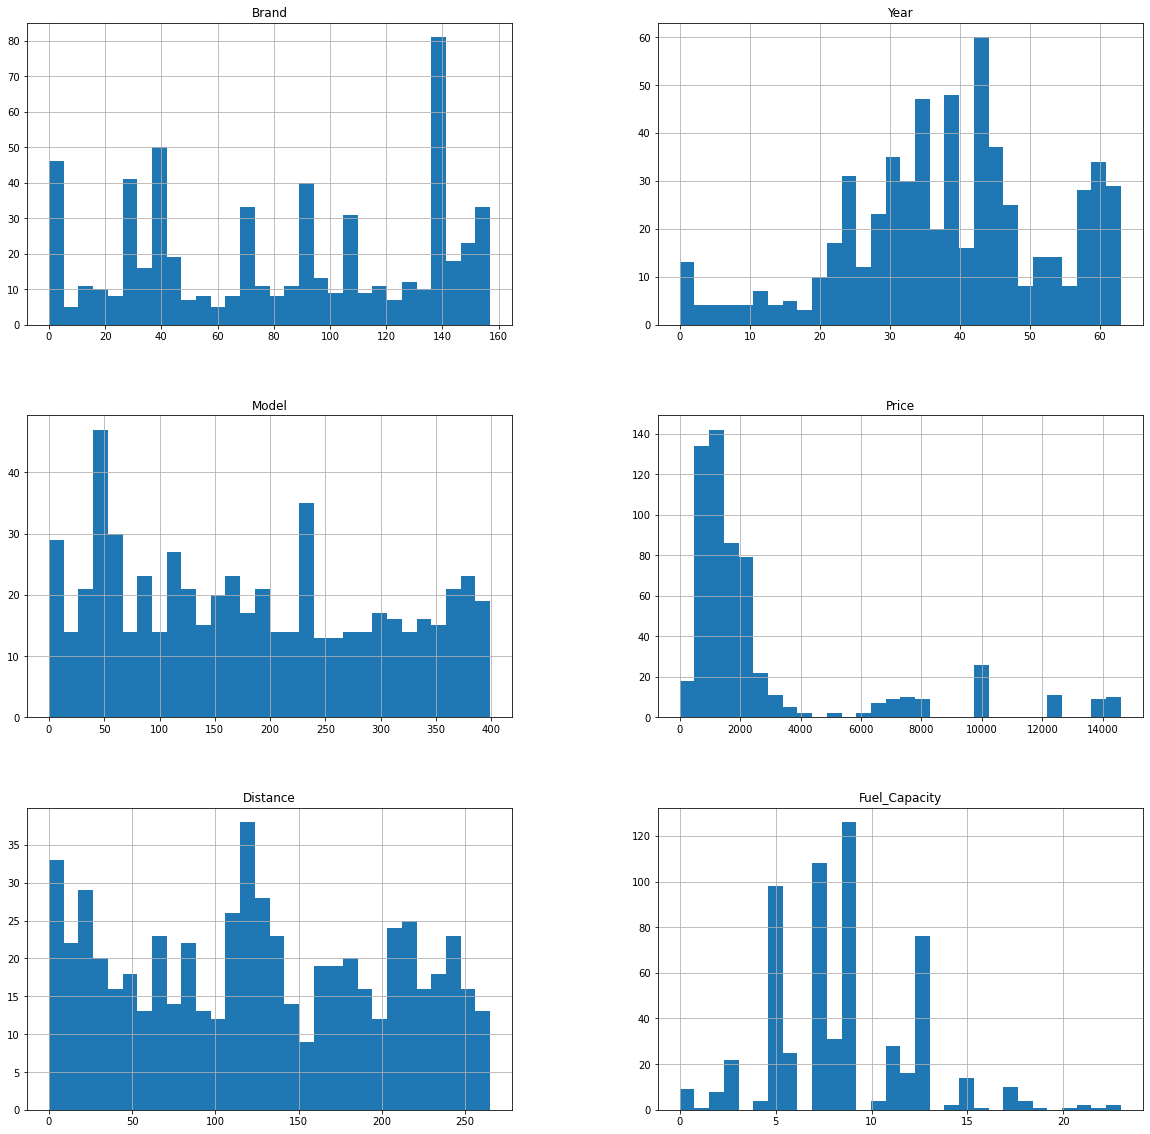

In [47]:
#we will plot histrogram for our numerical data to check skewness of the distribution:
'''Histogram : to see the numeric data distribution'''
train_data.hist(figsize=(20,20), grid = True, bins = 30)

In [48]:
#we see skewness in the above grafs. So, let's go and select numerical columns and check their corresponding skewness:
nf = train_data.select_dtypes(include=[np.number]).columns
nf

Index(['Brand', 'Year', 'Model', 'Price', 'Distance', 'Fuel_Capacity'], dtype='object')

In [49]:
#let's check skewness
from scipy.stats import skew
df=train_data
skew_list = skew(df[nf],nan_policy='omit') #sending all numericalfeatures and omitting nan values
skew_list_df = pd.concat([pd.DataFrame(nf,columns=['Features']),pd.DataFrame(skew_list,columns=['Skewness'])],axis = 1)

In [50]:
skew_list_df.sort_values(by='Skewness', ascending = False)

,Features,Skewness
3,Price,2.150582
5,Fuel_Capacity,0.651805
2,Model,0.206615
4,Distance,0.027847
0,Brand,-0.102667
1,Year,-0.366222


We have some skewness in our data!

In [51]:
#there shouldnt be any, but checking in case for categorical data of object type:
cf = train_data.select_dtypes(include=[np.object]).columns

cf

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Index([], dtype='object')

In [52]:
#let's check again dtypes of all columns as all of them should be integer type:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Brand          594 non-null    int64
 1   Year           594 non-null    int64
 2   Model          594 non-null    int64
 3   Price          594 non-null    int64
 4   Distance       594 non-null    int64
 5   Fuel_Capacity  594 non-null    int64
dtypes: int64(6)
memory usage: 28.0 KB


We can see that, all 6 columns are of numeric data types. Out of 6 variables, 5 are predictor variables and the one 'Price' is the target variable. The dataset is fine since there are no null values and all data is in type numerical integer type. So, let's move forward!

In [53]:
#no null values:
train_data.isnull().sum()

Brand            0
Year             0
Model            0
Price            0
Distance         0
Fuel_Capacity    0
dtype: int64

<AxesSubplot:>

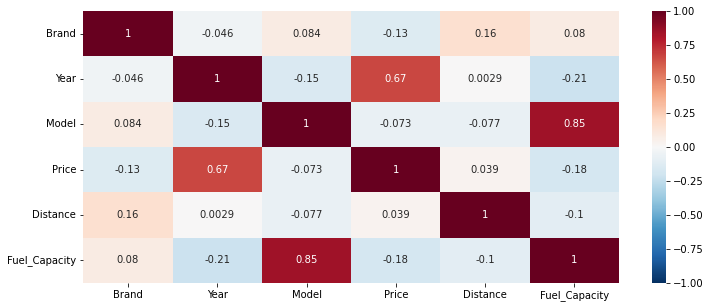

In [55]:
#Corelation between features/variables:
correlation = train_data.corr()
plt.figure(figsize=(12, 5))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

If we take out the correlation equal to 1, we see the highest correlation are:

- Feature Model is highly correlated with Fuel Capacity.

- And regarding the target Price, we see the feature that are highly correlated with it is the Year. 

Let's check plot of the correlation of the features with regards the target feature in the following code:

<AxesSubplot:>

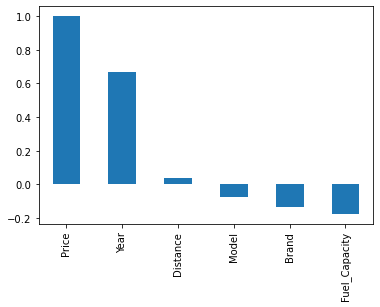

In [56]:
#correlation of independent features with regards the target "Price"
correlations =train_data.corr()['Price'].sort_values(ascending=False)
correlations.plot(kind='bar')

As we can see, as we said, Year has the most impact on our Price target feature. And then, we have other features like Fuel Capacity and Brand which impact more on price in second position and third position respectively.


Now let's check the features that has most impact on price:

In [58]:
correlations[abs(correlations) > 0.1]

Price            1.000000
Year             0.665209
Brand           -0.132861
Fuel_Capacity   -0.175060
Name: Price, dtype: float64

As we said, we have Year as the main independent feature that impacts the most on the Price of the used cars for the dataset we have. ANd then, Fuel Capacity and Brand have impact on price in second position and third position respectively.


In [59]:
#Checking the outliers and removing them:
from scipy.stats import zscore
import numpy as np
df=train_data
z=np.abs(zscore(df))
z.shape

(594, 6)

In [60]:
threhold=3
print(np.where(z>3))

(array([ 39,  52,  87,  96, 100, 112, 126, 152, 180, 190, 217, 230, 249,
       270, 320, 321, 324, 360, 372, 373, 386, 422, 438, 450, 528]), array([3, 3, 3, 5, 3, 3, 3, 3, 5, 3, 3, 3, 5, 5, 3, 3, 5, 3, 3, 3, 3, 5,
       3, 3, 3]))


In [61]:
#checking the dataset shape (with outliers and without outliers)
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(594, 6)
(569, 6)


In [62]:
#Percentage of data loss:
loss_perc=(594-569)/594*100
loss_perc #since the loss< 10%, so we can proceed with removing the outliers.

4.208754208754209

In [63]:
#Now let's split the data by features (X, all except Price Column) and target outcome (Y, Price)
X=df_new.drop(['Price'],axis=1)
Y=df_new['Price']

In [64]:
#Transforming the data to remove the skewness:
from sklearn.preprocessing import power_transform
x=power_transform(X,method='yeo-johnson')

In [65]:
#now we will standardrize the data 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.03037691,  1.87977543, -1.15127043,  0.08113673, -0.95942608],
       [ 0.08639501, -0.29541777, -2.12682092,  0.34203265, -2.372515  ],
       [-0.76640448, -0.22387357,  0.30663496,  1.39828293,  0.21091804],
       ...,
       [ 0.3727716 , -0.7180758 ,  0.14518657,  0.25300756,  0.21091804],
       [ 1.07989783,  0.50672651, -1.40383333, -1.38077752, -0.95942608],
       [-0.85946942,  1.49182201, -0.32995117,  0.23047671, -0.35533425]])

In [66]:
# Import library for VIF to check the multicolinearity:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def CalculateVIF(Data):
 # Calculating VIF
     vif = dict()
     vif["FeatureColumns"] = Data.columns
     vif["VIF"] = [variance_inflation_factor(Data.values, i) for i in range(Data.shape[1])]
     return(pd.DataFrame(vif))


CalculateVIF(df_new).sort_values(by='VIF',ascending=False)

,FeatureColumns,VIF
5,Fuel_Capacity,23.244952
2,Model,14.441806
1,Year,9.225343
0,Brand,3.897794
4,Distance,3.239941
3,Price,3.169212


Oh great! We do have such a high values of VIF as 2 of these are higher than VIF 10! Which means we need to remove some of the independent features in order to get less rate of VIFS which hence means less multicolinearity.

In [67]:
#let's start dropping the column Departure Time Hour as it has the highest VIF value:
df_new=df_new.drop(['Fuel_Capacity'],axis=1)
CalculateVIF(df_new).sort_values(by='VIF',ascending=False)

,FeatureColumns,VIF
1,Year,7.742510
0,Brand,3.741099
4,Distance,3.200617
3,Price,3.087034
2,Model,2.754576


Oh great! Now We do not have such a high values of VIF! Which means we can move forward with all the features we have now as these are not impacting as per multicolinearity point of view.

        - so we do not have multicolinearity. Good!

In [68]:
#Modeling
#We now proceed to the main step of our machine learning, fitting the model and predicting the outputs. We fit the data into multiple regression models to compare the performance of all models and select the best model –

#Importing libraries 

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

In [69]:
#Building Machine Learning Models
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
for i in range(0,10):
    X_train, X_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.25, random_state=i)
    lr.fit(X_train,Y_train)
    pred_train=lr.predict(X_train)
    pred_test=lr.predict(X_test)
    print(f"At random state {i}, the training accuracy is:  {r2_score(Y_train,pred_train)}")
    print(f"At random state {i}, the testing accuracy is:  {r2_score(Y_test,pred_test)}")
    print("\n")

At random state 0, the training accuracy is:  0.48160336894914435
At random state 0, the testing accuracy is:  0.5336913456324375


At random state 1, the training accuracy is:  0.5084031696171272
At random state 1, the testing accuracy is:  0.423062430370587


At random state 2, the training accuracy is:  0.49160142922255
At random state 2, the testing accuracy is:  0.4989686558787796


At random state 3, the training accuracy is:  0.49759253832301553
At random state 3, the testing accuracy is:  0.4757004624091856


At random state 4, the training accuracy is:  0.4813078917180914
At random state 4, the testing accuracy is:  0.5356465565887503


At random state 5, the training accuracy is:  0.48886229736071807
At random state 5, the testing accuracy is:  0.49827666044359065


At random state 6, the training accuracy is:  0.4889262172130071
At random state 6, the testing accuracy is:  0.4898258797123821


At random state 7, the training accuracy is:  0.47667450644686826
At random state 

In [70]:
for i in range(0,10): #checking the difference between both  training and testing accuracy:
    print(f"At random state {i}, the training accuracy is:  { r2_score(Y_train,pred_train)-r2_score(Y_test,pred_test)}") 

At random state 0, the training accuracy is:  0.07329018491568817
At random state 1, the training accuracy is:  0.07329018491568817
At random state 2, the training accuracy is:  0.07329018491568817
At random state 3, the training accuracy is:  0.07329018491568817
At random state 4, the training accuracy is:  0.07329018491568817
At random state 5, the training accuracy is:  0.07329018491568817
At random state 6, the training accuracy is:  0.07329018491568817
At random state 7, the training accuracy is:  0.07329018491568817
At random state 8, the training accuracy is:  0.07329018491568817
At random state 9, the training accuracy is:  0.07329018491568817


In [71]:
#let's take radom state of 5 as the difference is same:

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
X_train, X_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.25, random_state=5)
lr.fit(X_train,Y_train)

LinearRegression()

In [72]:
#checking the R2 Score for the linear regression:
from sklearn.metrics import r2_score
pred_test=lr.predict(X_test)
print(r2_score(Y_test,pred_test))

0.49827666044359065


In [73]:
#Cross validation of the model Linear regression:
Train_accuracy=r2_score(Y_train,pred_train)
Test_accuracy=r2_score(Y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,20):
    cv_score=cross_val_score(lr,x,Y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the CV score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}")
    print("\n")

At cross fold 2 the CV score is 0.4902813037432159 and accuracy score for training is -0.5619228678359762 and accuracy for the testing is 0.49827666044359065


At cross fold 3 the CV score is 0.49131693595794906 and accuracy score for training is -0.5619228678359762 and accuracy for the testing is 0.49827666044359065


At cross fold 4 the CV score is 0.4900892107382985 and accuracy score for training is -0.5619228678359762 and accuracy for the testing is 0.49827666044359065


At cross fold 5 the CV score is 0.48664905101277434 and accuracy score for training is -0.5619228678359762 and accuracy for the testing is 0.49827666044359065


At cross fold 6 the CV score is 0.48158697032210035 and accuracy score for training is -0.5619228678359762 and accuracy for the testing is 0.49827666044359065


At cross fold 7 the CV score is 0.4828637505973569 and accuracy score for training is -0.5619228678359762 and accuracy for the testing is 0.49827666044359065


At cross fold 8 the CV score is 0.488

In [94]:
#difference of training and testing set in terms of accuracy:
from sklearn.model_selection import cross_val_score
for j in range(2,20):
    cv_score=cross_val_score(lr,x,Y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the CV score is {cv_mean} and accuracy score diference between training and testing is {Train_accuracy-Test_accuracy}")
    print("\n")

At cross fold 2 the CV score is 0.4902813037432159 and accuracy score diference between training and testing is -1.0601995282795669


At cross fold 3 the CV score is 0.49131693595794906 and accuracy score diference between training and testing is -1.0601995282795669


At cross fold 4 the CV score is 0.4900892107382985 and accuracy score diference between training and testing is -1.0601995282795669


At cross fold 5 the CV score is 0.48664905101277434 and accuracy score diference between training and testing is -1.0601995282795669


At cross fold 6 the CV score is 0.48158697032210035 and accuracy score diference between training and testing is -1.0601995282795669


At cross fold 7 the CV score is 0.4828637505973569 and accuracy score diference between training and testing is -1.0601995282795669


At cross fold 8 the CV score is 0.488788806800766 and accuracy score diference between training and testing is -1.0601995282795669


At cross fold 9 the CV score is 0.484949831917223 and accura

In [ ]:
!pip install LogUniform

In [84]:
#importingsome more libraries i may use:
from scipy.stats import loguniform
from pandas import read_csv
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV

In [91]:
#Regularization: importing libraries:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings 
warnings.filterwarnings('ignore')

In [92]:
#we will cross validate with Lasso techniquue
from sklearn.linear_model import Lasso
parameters={ 'alpha':[.0001,.001,.01,.1,1,10], 'random_state': list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [93]:
#checking the r2 score with Lasso technique:
ls=Lasso(alpha=10,random_state=0)
ls.fit(X_train,Y_train)
ls.score(X_train,Y_train)
pred_ls=ls.predict(X_test)
lss=r2_score(Y_test,pred_ls)
lss

0.4960990816544898

In [95]:
#best cross fold are all which cmpared, so let's take for example 21 to check the results and compare the previous best one:
cv_score=cross_val_score(ls,x,Y,cv=21)
cv_mean=cv_score.mean()
cv_mean

0.46607820211922485

In [96]:
#let's try with Ensemble Technique including Random ForestRegressor:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'log2'}


In [97]:
#Checking the R2 Score an CV of Rfr:
rf=RandomForestRegressor(criterion="mse",max_features="log2")
rf.fit(X_train,Y_train)
rf.score(X_train,Y_train)
pred_decision=rf.predict(X_test)

rfs=r2_score(Y_test,pred_decision)
print('R2 score:',rfs*100)

rfscore=cross_val_score(rf,x,Y, cv=5)
rfc=rfscore.mean()
print('Cross Val Score:', rfc*100)

pred_test=rf.predict(X_test)
print(r2_score(Y_test,pred_test))

R2 score: 95.69046049242618
Cross Val Score: 94.76778679383649
0.9569046049242618


In [99]:
#cheching the differents agorithms and compare their results:

dt=DecisionTreeRegressor()
svr=SVR()
knn=KNeighborsRegressor()
lr=LinearRegression()

x_train, x_test, y_train, y_test=train_test_split(x,Y,test_size=0.25,random_state=42)
for i in [dt,svr,knn,lr]:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    test_score=r2_score(y_test,pred)
    train_score=r2_score(y_train,i.predict(x_train))
    if abs(train_score-test_score)<=0.1:
        print(i)
        print("R2 score is: ", r2_score(y_test,pred))
        print("R2 score for train data: ", r2_score(y_train,i.predict(x_train)))
        print("Mean absolute error is: ", mean_absolute_error(y_test, pred))
        print("Mean squared error is: ", mean_squared_error(y_test, pred))
        print("Root mean squared error is: ", (mean_squared_error(y_test,pred)))     

DecisionTreeRegressor()
R2 score is:  0.9149358252373978
R2 score for train data:  1.0
Mean absolute error is:  493.13986013986016
Mean squared error is:  670323.5734265734
Root mean squared error is:  670323.5734265734
SVR()
R2 score is:  -0.07415431111064952
R2 score for train data:  -0.11004511003778439
Mean absolute error is:  1466.4813138283573
Mean squared error is:  8464561.705849942
Root mean squared error is:  8464561.705849942
KNeighborsRegressor()
R2 score is:  0.915927278190168
R2 score for train data:  0.961096828633249
Mean absolute error is:  426.02657342657346
Mean squared error is:  662510.7158041958
Root mean squared error is:  662510.7158041958
LinearRegression()
R2 score is:  0.4694354233668111
R2 score for train data:  0.49789584645364293
Mean absolute error is:  1556.9087768773898
Mean squared error is:  4180960.362395414
Root mean squared error is:  4180960.362395414


We achieve the best score using K-Neighbors regressor, with an r2_score of 91,5%. We also obtain the minimum values for mean_absolute_error, mean_squared_error and root_mean_squared_error (regression metrics) with this model. We try to use ensemble models to check if our performance improves using ensemble models -

In [100]:
#importing the RFR, ADBR, GBR and comparing these too:

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

rfr=RandomForestRegressor()
adaB=AdaBoostRegressor()
gbr=GradientBoostingRegressor()


x_train, x_test, y_train, y_test=train_test_split(x,Y,test_size=0.25,random_state=42)
for i in [rfr,adaB,gbr]:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    test_score=r2_score(y_test,pred)
    train_score=r2_score(y_train,i.predict(x_train))
    if abs(train_score-test_score)<=0.1:
        print(i)
        print("R2 score is: ", r2_score(y_test,pred))
        print("R2 score for train data: ", r2_score(y_train,i.predict(x_train)))
        print("Mean absolute error is: ", mean_absolute_error(y_test, pred))
        print("Mean squared error is: ", mean_squared_error(y_test, pred))
        print("Root mean squared error is: ", (mean_squared_error(y_test,pred)))

RandomForestRegressor()
R2 score is:  0.9558515607453922
R2 score for train data:  0.992938137864237
Mean absolute error is:  350.28069930069927
Mean squared error is:  347898.9791524476
Root mean squared error is:  347898.9791524476
AdaBoostRegressor()
R2 score is:  0.9362654588284185
R2 score for train data:  0.949623652164335
Mean absolute error is:  553.5138310586353
Mean squared error is:  502241.5782915505
Root mean squared error is:  502241.5782915505
GradientBoostingRegressor()
R2 score is:  0.9598569410557002
R2 score for train data:  0.9826533268482635
Mean absolute error is:  367.4079697096579
Mean squared error is:  316335.7405736792
Root mean squared error is:  316335.7405736792


In [102]:
#we see the GBR and RFR are the best algorithms for this dataset, so let's study these 2 and compare the results:

gbr=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None,
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)
test_score=r2_score(y_test,pred)
train_score=r2_score(y_train,gbr.predict(x_train))
if abs(train_score-test_score)<=0.1:
    print(gbr)
    print("R2 score is: ", r2_score(y_test,pred))
    print("R2 score for train data: ", r2_score(y_train,gbr.predict(x_train)))
    print("Mean absolute error is: ", mean_absolute_error(y_test, pred))
    print("Mean squared error is: ", mean_squared_error(y_test, pred))
    print("Root mean squared error is: ", (mean_squared_error(y_test,pred)))

GradientBoostingRegressor()
R2 score is:  0.9596550456497809
R2 score for train data:  0.9826533268482635
Mean absolute error is:  368.19430106790014
Mean squared error is:  317926.718800787
Root mean squared error is:  317926.718800787


In [104]:
#checking the best cross validation score for GBR and checking the mean of CV:
from sklearn.model_selection import cross_val_score
for i in range(2,9):
    cv=cross_val_score(gbr,x_train,y_train,cv=i)
    print(gbr,cv.mean())

GradientBoostingRegressor() 0.9418239000683557
GradientBoostingRegressor() 0.9407265994709123
GradientBoostingRegressor() 0.9386743304419151
GradientBoostingRegressor() 0.941392582680313
GradientBoostingRegressor() 0.9454766401229712
GradientBoostingRegressor() 0.9472976120238732
GradientBoostingRegressor() 0.943040218229074


In [106]:
#checking the best cross validation for RFR and checking the mean of CV:
from sklearn.model_selection import cross_val_score
for i in range(2,9):
    cv=cross_val_score(rfr,x_train,y_train,cv=i)
    print(rfr,cv.mean())

RandomForestRegressor() 0.9402367456875137
RandomForestRegressor() 0.9452351648668187
RandomForestRegressor() 0.9398170124927898
RandomForestRegressor() 0.9408413142214502
RandomForestRegressor() 0.944925332702473
RandomForestRegressor() 0.947834267847169
RandomForestRegressor() 0.9439951979413568


The Random Forest Regressor provides us a cross validation score of 94,78%, and gradient boosting regressor gives a score of 94,72%. We will hypertune both the models to check if our accuracy improves. Hypertuning the model GridSearch CV is a technique used to validate the model with different parameter combinations, by creating a grid of parameters and trying all the combinations to compare which combination give us the best results. We should apply Grid search only on our best algorithm. But just to make sure we are getting the best results and hence selecting the best model, we will apply grid search on our 2 model –

In [107]:
#First on our best model:
rfr2=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False) #0.8844732565790787

rfr2.fit(x_train,y_train)
pred=rfr2.predict(x_test)
test_score=r2_score(y_test,pred)
train_score=r2_score(y_train,rfr2.predict(x_train))
if abs(train_score-test_score)<=0.3:
    print(rfr2)
    print(abs(train_score-test_score))
    print("R2 score is: ", r2_score(y_test,pred))
    print("R2 score for train data: ", r2_score(y_train,rfr2.predict(x_train)))
    print("Mean absolute error is: ", mean_absolute_error(y_test, pred))
    print("Mean squared error is: ", mean_squared_error(y_test, pred))
    print("Root mean squared error is: ", (mean_squared_error(y_test,pred)))

RandomForestRegressor(n_estimators=10)
0.03897058813496479
R2 score is:  0.9515240725363642
R2 score for train data:  0.990494660671329
Mean absolute error is:  391.03356643356636
Mean squared error is:  382000.4956643356
Root mean squared error is:  382000.4956643356


In [108]:
#let's search the best parameters for our best model RFR through Gridsearch:
from sklearn.model_selection import GridSearchCV
param_grid={'n_estimators':[10,50,100,200], 'max_depth':[None,1,3], 'min_samples_split': [2,4,10]}

gcv_rfr=GridSearchCV(rfr,param_grid,cv=3)

#fitting the model:

res=gcv_rfr.fit(x_train,y_train)

res.best_params_ #checking the best parameters:

{'max_depth': None, 'min_samples_split': 4, 'n_estimators': 200}

In [109]:
res.best_score_ #checking the best score for model RFR for the given parameters:

0.9441465958527454

In [111]:
#let's check rfr2:
from sklearn.model_selection import GridSearchCV
param_grid={'n_estimators':[10,50,100,200], 'max_depth':[None,1,3], 'min_samples_split': [2,4,10]}

gcv_rfr2=GridSearchCV(rfr2,param_grid,cv=3)

#fitting the model:

res2=gcv_rfr2.fit(x_train,y_train)

res2.best_params_ #checking the best parameters:

{'max_depth': None, 'min_samples_split': 4, 'n_estimators': 200}

In [112]:
res2.best_score_ #and best score for rfr2:

0.9446942883974992

In [113]:
#to avoid overfitting, on our second best model too we will do the gridsearch for GBR:
param_grid2={'alpha':[0.09,0.98], 'learning_rate':[0.01,0.1],'max_depth':[5,2], 'min_samples_leaf':[1,2], 'n_estimators': [10,100]}
gcv_gd=GridSearchCV(gbr,param_grid2,cv=3)
res3=gcv_gd.fit(x_train,y_train)
res3.best_params_ #checking for best parameters:

{'alpha': 0.98,
 'learning_rate': 0.1,
 'max_depth': 2,
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [114]:
res3.best_score_ #checking for best score for GBR:

0.9427376090281715

In [115]:
#creating model instance with best params for GBR model:                        
model=GradientBoostingRegressor(alpha=0.098,
                                learning_rate=0.1,
                                max_depth=2,
                                min_samples_split=2,
                                min_samples_leaf=1,
                                n_estimators=100)

model.fit(x_train,y_train)
pred=model.predict(x_test)
test_score=r2_score(y_test,pred)
train_score=r2_score(y_train,model.predict(x_train))
if abs(train_score-test_score)<=0.3:
    print(rfr2)----------------------------------------------------------------------------->delete the outputs of this print, its GBR model not RF
    print(abs(train_score-test_score))
    print("R2 score is: ", r2_score(y_test,pred))
    print("R2 score for train data: ", r2_score(y_train,model.predict(x_train)))
    print("Mean absolute error is: ", mean_absolute_error(y_test, pred))
    print("Mean squared error is: ", mean_squared_error(y_test, pred))
    print("Root mean squared error is: ", (mean_squared_error(y_test,pred)))

RandomForestRegressor(n_estimators=10)
0.011449948311814562
R2 score is:  0.9537134890052974
R2 score for train data:  0.965163437317112
Mean absolute error is:  400.82168588558903
Mean squared error is:  364747.4337817024
Root mean squared error is:  364747.4337817024


The r2_score received for Gradient Boosting Regressor comes out to be better after hypertuning, which is 95,37%, as compared to Random Forest Regressor giving accuracy as 94,46%. The value of MAE also decreases, signifying that we were able to tune our model as we can see below. Hence we select Gradient Boosting Regressor as our final model, save the model using best parameters, and create model object using pickle.

In [116]:
#let's give another try before we close our final decision:
from sklearn.model_selection import RandomizedSearchCV
n_estimators=[int(x) for x in np.linspace(start=100, stop=1200, num=6)]
max_depth=[int(x) for x in np.linspace(start=5, stop=30, num=4)]

random_grid={
    'n_estimators': n_estimators,
    'max_features': ['auto','sqrt'],
    'max_depth':max_depth,
    'min_samples_split':[5,10,15,100]}

rf_random=RandomizedSearchCV(estimator= model, param_distributions= random_grid, cv=3, verbose=2, n_jobs=-1)
rf_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


{'n_estimators': 980,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 30}

In [117]:
rf_random.best_score_ #we see the results are the worst:

-0.29601345070808976

So finally, The r2_score received for Gradient Boosting Regressor comes out to be better after hypertuning, which is 95,37%, as compared to Random Forest Regressor giving accuracy as 94,46%. The value of MAE also decreases, signifying that we were able to tune our model as we can see above. Hence we select Gradient Boosting Regressor as our final model, save the model using best parameters, and create model object using pickle.

Since the best model we have is the model GBR so finally we will select it as our final model and do the predictions:

<AxesSubplot:xlabel='Price', ylabel='Density'>

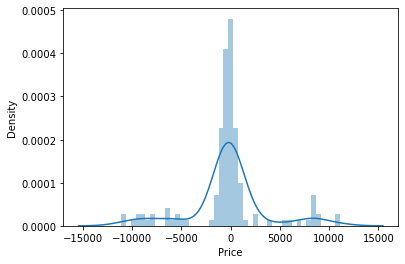

In [118]:
prediction=model.predict(X_test)
sns.distplot(y_test-prediction)

In [120]:
#r2 score of the predicted values of training values compared to actual price:
result_ontestfromtrainingset=r2_score(y_train,model.predict(X_train))
abs(result_ontestfromtrainingset)

0.849046954265283

In [122]:
#r2 score of the predicted values of testing values compared to actual price:
result_ontestfromtestset=r2_score(y_test,model.predict(X_test))
abs(result_ontestfromtestset)

0.9142911805346683

<AxesSubplot:xlabel='Price', ylabel='Density'>

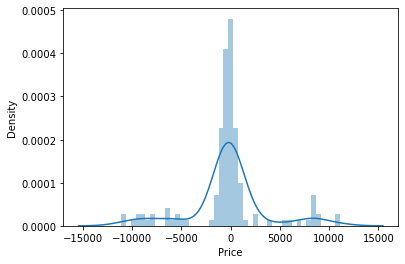

In [124]:
#prediction on the test data and check residual:
prediction=model.predict(X_test)
sns.distplot(y_test-prediction)

We have achieved an r2_score value of 91% on the testing set, meaning that we are actually able to predict values quite near to the actual prices, for majority of the rows. A glimpse of our resulting dataframe is attached below for the testing set. We load the test file, apply all the data modeling processes and operations on our test data similar to what we did with the train data, and then make the final prediction using the saved model object as follows:

In [126]:
#saving the model:
import pickle
filename='Cars_prediction.pkl'
pickle.dump(model,open(filename,'wb'))

In [127]:
#loading the model and checking the accuracy on the test data:
import pickle
loaded_model=pickle.load(open('Cars_prediction.pkl','rb'))
result=loaded_model.score(X_test,Y_test)
print(result)

0.9707214431840046


In [129]:
#97,07% is a good accuracy on the test data:
Conclusion=pd.DataFrame([loaded_model.predict(X_test)[:],pred_decision[:]],index=["Predicted","Original"])

In [130]:
#here you have a glimpse of test dataset:
Conclusion

,0,1,2,3,4,5,6,7,8,9,...,133,134,135,136,137,138,139,140,141,142
Predicted,851.995102,1149.51597,1802.704061,1825.479506,877.939139,2293.647818,1384.892749,1233.52491,768.803242,768.912714,...,2007.657147,1599.467143,1082.096038,1473.265889,1592.087959,2195.832151,10259.735236,1412.672151,1410.545496,1562.345508
Original,795.000000,1466.32000,1710.750000,1449.090000,1115.570000,1656.800000,1321.290000,1128.23000,885.720000,806.130000,...,1792.600000,1703.190000,1203.080000,1365.060000,557.350000,2314.090000,10124.000000,1302.600000,1426.410000,1121.360000
